In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm
pd.set_option('display.max_columns', None)

In [2]:
file = pd.read_csv("TMDB_movie_dataset_v11.csv")
tmbd_data = pd.DataFrame(file)
tmbd_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
#exract date to only movies released between 01JAN19 and 31DEC23
start_date = '2019-01-01'  
end_date = '2023-12-31'    
movies_2019_2023_df = tmbd_data[(tmbd_data['release_date'] >= start_date) & (file['release_date'] <= end_date)]
movies_2019_2023_df = movies_2019_2023_df.copy()



In [4]:
movies_2019_2023_df["budget"] = movies_2019_2023_df["budget"].astype(int)
movies_2019_2023_df["Total Budget"] = movies_2019_2023_df["budget"] + (movies_2019_2023_df["budget"]*.5)
movies_2019_2023_df["% Profit"] = movies_2019_2023_df["revenue"]/movies_2019_2023_df["Total Budget"]*100
# movies_2019_2023_df["% Profit"] = movies_2019_2023_df["% Profit"].map("{:,.2f}%".format)
# movies_2019_2023_df["Total Budget"] = movies_2019_2023_df["Total Budget"].map("${:,.0f}".format)
# movies_2019_2023_df["revenue"] = movies_2019_2023_df["revenue"].map("${:,.0f}".format)
# movies_2019_2023_df["budget"] = movies_2019_2023_df["budget"].map("${:,.0f}".format)
# movies_2019_2023_df.head()

In [5]:
cleaned_movie_df = movies_2019_2023_df[["id", "title", "budget", "Total Budget", "revenue", "% Profit", "genres", "vote_average", "vote_count", "popularity"]]
cleaned_movie_df.head()

,id,title,budget,Total Budget,revenue,% Profit,genres,vote_average,vote_count,popularity
15,299534,Avengers: Endgame,356000000,534000000.0,2800000000,524.344569,"Adventure, Science Fiction, Action",8.263,23857,91.756
18,475557,Joker,55000000,82500000.0,1074458282,1302.373675,"Crime, Thriller, Drama",8.168,23425,54.522
57,634649,Spider-Man: No Way Home,200000000,300000000.0,1921847111,640.615704,"Action, Adventure, Science Fiction",7.990,18299,186.065
81,496243,Parasite,11363000,17044500.0,257591776,1511.289718,"Comedy, Thriller, Drama",8.515,16430,64.627
117,299537,Captain Marvel,152000000,228000000.0,1131416446,496.235283,"Action, Adventure, Science Fiction",6.843,14657,50.399


In [6]:
# Filter the DataFrame based on genres
filtered_df = movies_2019_2023_df[cleaned_movie_df['genres'].str.contains('Romance', na=False) | 
                                  cleaned_movie_df['genres'].str.contains('Comedy', na=False) |
                                  cleaned_movie_df['genres'].str.contains('Action', na=False) |
                                  cleaned_movie_df['genres'].str.contains('Science Fiction', na=False) |
                                  cleaned_movie_df['genres'].str.contains('Horror', na=False)].copy()

# Calculate Total Budget and % Profit using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'Total Budget'] = filtered_df['budget'] * 1.5
filtered_df.loc[:, '% Profit'] = (filtered_df['revenue'] / filtered_df['Total Budget']) * 100

# Convert Total Budget to an integer
filtered_df.loc[:, 'Total Budget'] = filtered_df['Total Budget'].astype(int)

# Drop rows where Total Budget or Revenue is 0
cleaned_filter_df = filtered_df[(filtered_df['Total Budget'] != 0) & (filtered_df['revenue'] != 0)]
cleaned_filter_df = filtered_df[(filtered_df['Total Budget'] > 10000000) & (filtered_df['revenue'] > 10000000)]

# Select relevant columns
cleaned_filter_df = cleaned_filter_df[["id", "title", "budget", "Total Budget", "revenue", "% Profit", "genres", "vote_average", "vote_count", "popularity"]]

# Display the minimum value of "Total Budget"
cleaned_filter_df = cleaned_filter_df.sort_values(by="% Profit", ascending=False)
cleaned_filter_df.head()


,id,title,budget,Total Budget,revenue,% Profit,genres,vote_average,vote_count,popularity
1300,635302,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,15800000,23700000.0,503063688,2122.631595,"Action, Animation, Adventure, Fantasy, Thriller",8.259,3413,96.797
81,496243,Parasite,11363000,17044500.0,257591776,1511.289718,"Comedy, Thriller, Drama",8.515,16430,64.627
777,570670,The Invisible Man,7000000,10500000.0,144492724,1376.121181,"Thriller, Science Fiction, Horror",7.129,5282,22.738
974,522681,Escape Room,9000000,13500000.0,155712077,1153.422793,"Horror, Thriller, Mystery",6.535,4315,25.429
10732,567646,Extreme Job,8120000,12180000.0,124652206,1023.417126,"Action, Comedy, Crime",7.054,230,12.303


In [7]:
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    return regress_values, rvalue**2, line_eq

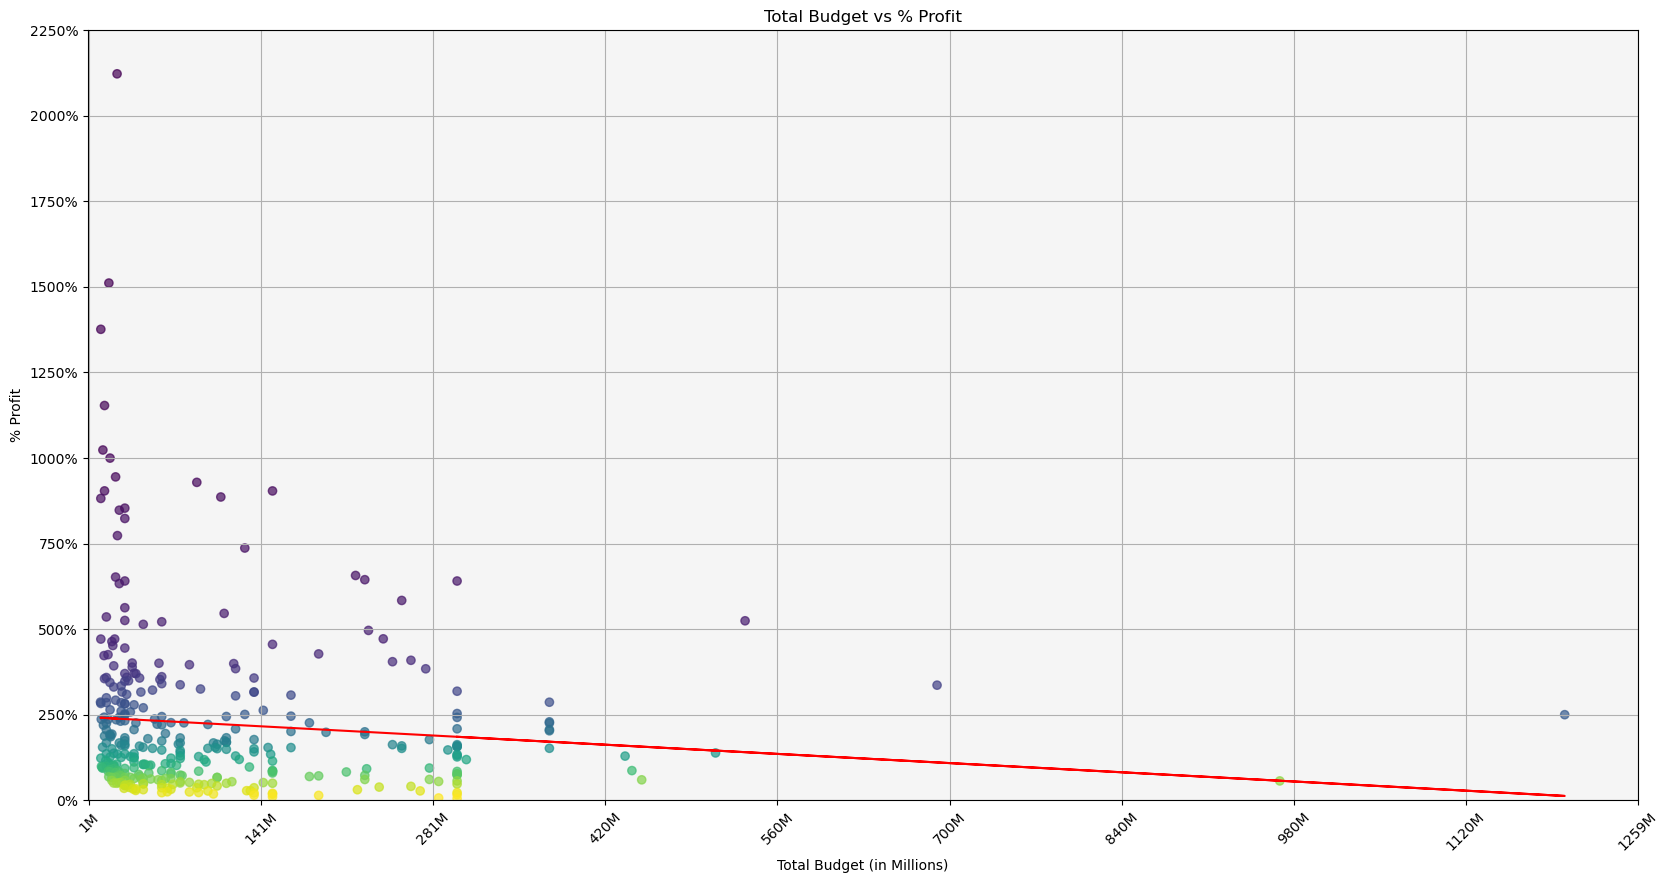

The r-value is: 0.010746837895366696


In [8]:
# All movies Total Budget vs % Profit
x_value = cleaned_filter_df["Total Budget"]
y_value = cleaned_filter_df["% Profit"]

# Check if y_value is in whole numbers and convert to decimal if necessary
if y_value.max() > 1:
    y_value = y_value / 100  # Convert to decimal if values are in percentage form

# Calculate the min and max of x_value
min_x = x_value.min()
max_x = x_value.max()

# Define padding (for example, 5% of the range)
padding = 0.05 * (max_x - min_x)

# Adjust min_x and max_x with padding (ensuring min_x does not go below 0)
min_x_padded = max(1000000, min_x - padding)  # Ensuring min_x_padded is not less than 0
max_x_padded = max_x + padding

# Create a range of x ticks from min_x_padded to max_x_padded
x_ticks = np.linspace(min_x_padded, max_x_padded, num=10)

# Determine the max value for the y-axis
max_y_padded = y_value.max() + (0.05 * (y_value.max() - y_value.min()))  # Add padding to the max y-value

plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axes
ax.set_facecolor('whitesmoke')

# Set limits for the x and y axes with padding
plt.xlim(0, max_x_padded)  # Set x-axis starting at 0
plt.ylim(0, max_y_padded)  # Set y-axis limit with padding

# Create the scatter plot with color customization
colors = plt.cm.viridis(np.linspace(0, 1, len(x_value)))  # Customize color
plt.scatter(x_value, y_value, color=colors, alpha=0.7)  # Set alpha for visibility

# Set x ticks explicitly with rotation
plt.xticks(x_ticks, rotation=45)  # Rotate x ticks by 45 degrees

# Set y ticks explicitly with rotation
y_ticks = plt.yticks()[0]  # Get current y ticks
plt.yticks(y_ticks)  # Rotate y ticks by 45 degrees

# Define a formatter function for the x-axis to convert to millions
def millions(x, pos):
    return f'{x / 1_000_000:.0f}M'  # Format as millions

# Define a formatter function for the y-axis to convert to percentage
def percent_formatter(x, pos):
    return f'{x * 100:.0f}%'  # Format as percentage

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Add grid lines for better visualization
plt.grid(True)

regress_values, r_squared, line_eq = linear_regression(x_value, y_value)
plt.plot(x_value, regress_values, "r-")

# Add labels and title for better understanding
plt.xlabel("Total Budget (in Millions)")
plt.ylabel("% Profit")
plt.title("Total Budget vs % Profit")


# Display the plot
#plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.savefig("graphics/budge_profit.png")
plt.show()
print(f"The r-value is: {r_squared}")



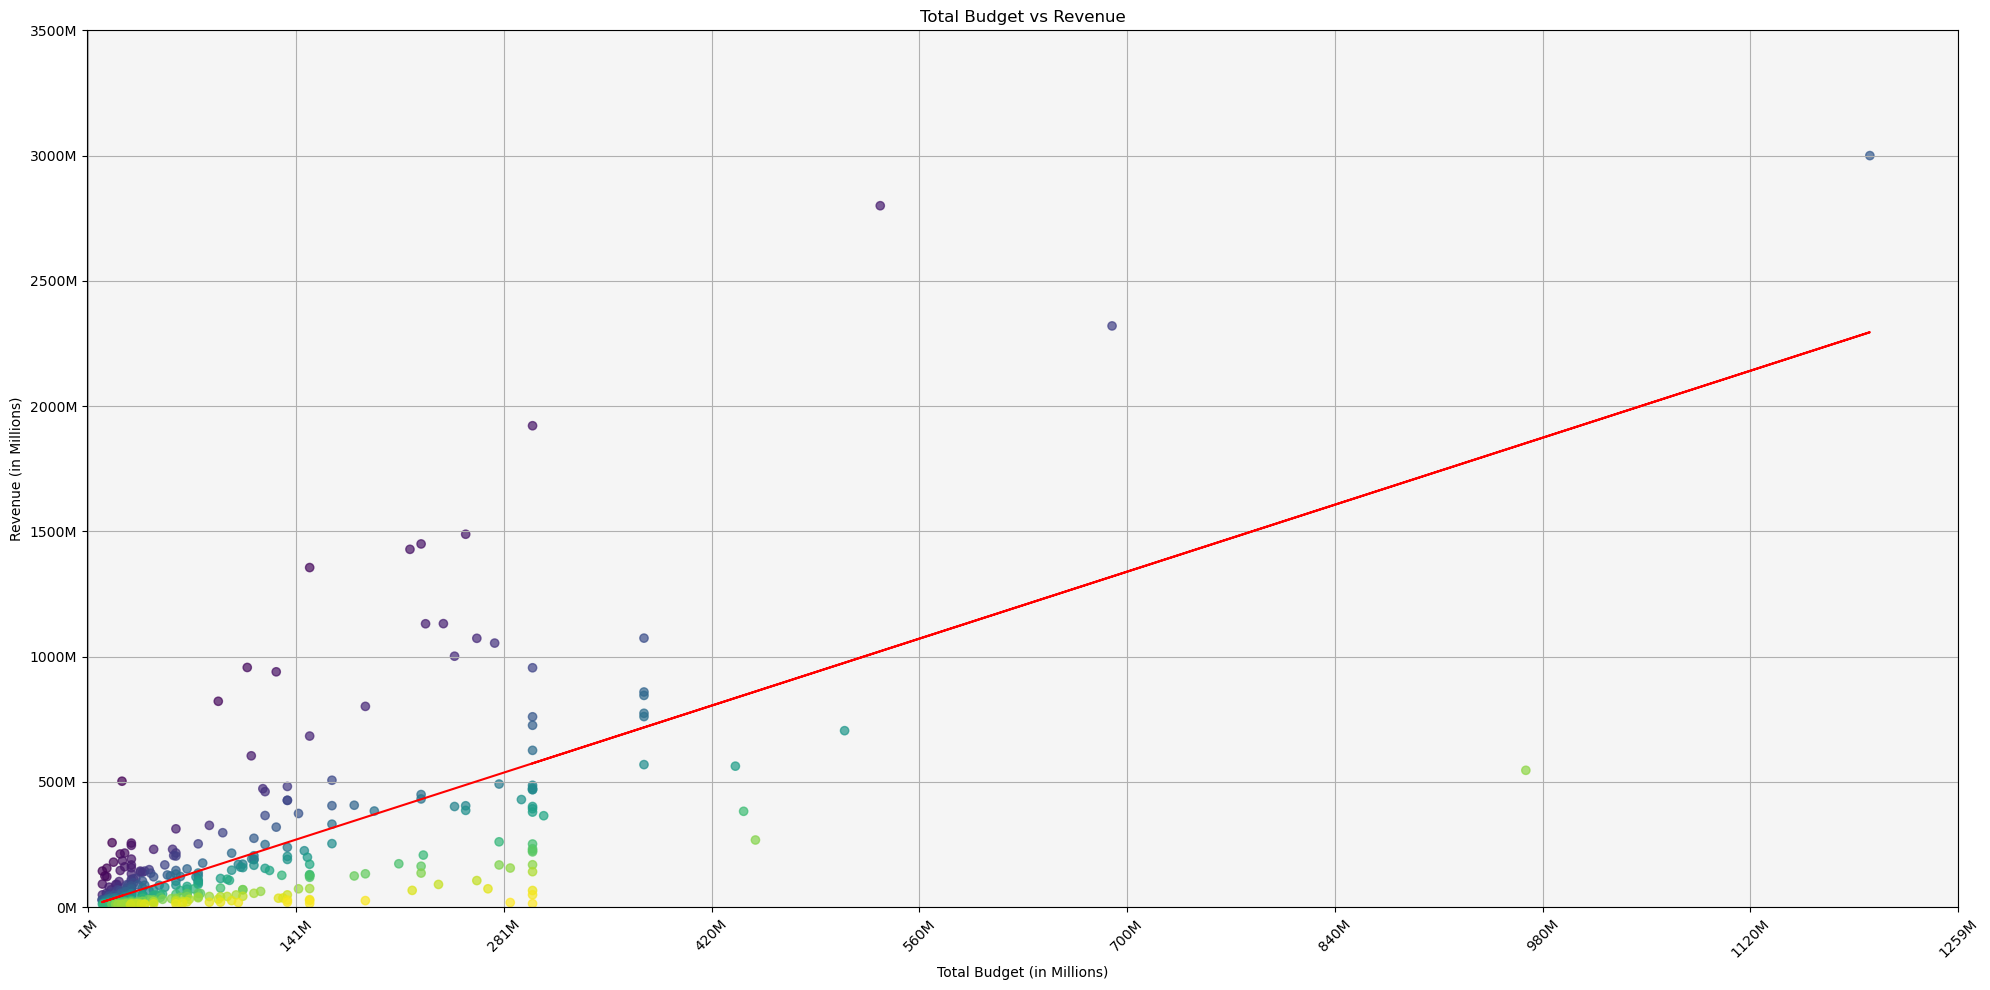

The r-value is: 0.4843842278753481


In [9]:
# all movies Total Budget vs Revenue
x_value = cleaned_filter_df["Total Budget"]
y_value = cleaned_filter_df["revenue"]


# Convert y_value to millions
y_value = y_value / 1_000_000  # Convert revenue to millions

# Calculate the min and max of x_value
min_x = x_value.min()
max_x = x_value.max()

# Define padding (for example, 5% of the range)
padding = 0.05 * (max_x - min_x)

# Adjust min_x and max_x with padding (ensuring min_x does not go below 0)
min_x_padded = max(1000000, min_x - padding)  # Ensuring min_x_padded is not less than 0
max_x_padded = max_x + padding

# Create a range of x ticks from min_x_padded to max_x_padded
x_ticks = np.linspace(min_x_padded, max_x_padded, num=10)

# Determine the max value for the y-axis
max_y_padded = y_value.max() + (0.05 * (y_value.max() - y_value.min()))  # Add padding to the max y-value

plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axes
ax.set_facecolor('whitesmoke')

# Set limits for the x and y axes with padding
plt.xlim(0, max_x_padded)  # Set x-axis starting at 0
plt.ylim(0, max_y_padded)  # Set y-axis limit with padding

# Create the scatter plot with color customization
colors = plt.cm.viridis(np.linspace(0, 1, len(x_value)))  # Customize color
plt.scatter(x_value, y_value, color=colors, alpha=0.7)  # Set alpha for visibility

# Set x ticks explicitly with rotation
plt.xticks(x_ticks, rotation=45)  # Rotate x ticks by 45 degrees

# Set y ticks explicitly with rotation
y_ticks = plt.yticks()[0]  # Get current y ticks
plt.yticks(y_ticks)  # Rotate y ticks by 45 degrees

# Define a formatter function for the x-axis to convert to millions
def millions(x, pos):
    return f'{x / 1_000_000:.0f}M'  # Format as millions

# Define a formatter function for the y-axis to display in millions
def millions_y(x, pos):
    return f'{x:.0f}M'  # Format as millions for y-axis

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_y))

# Add grid lines for better visualization
plt.grid(True)

regress_values, r_squared, line_eq = linear_regression(x_value, y_value)
plt.plot(x_value, regress_values, "r-")

# Add labels and title for better understanding
plt.xlabel("Total Budget (in Millions)")
plt.ylabel("Revenue (in Millions)")
plt.title("Total Budget vs Revenue")

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.savefig("graphics/budget_revenue.png")
plt.show()
print(f"The r-value is: {r_squared}")


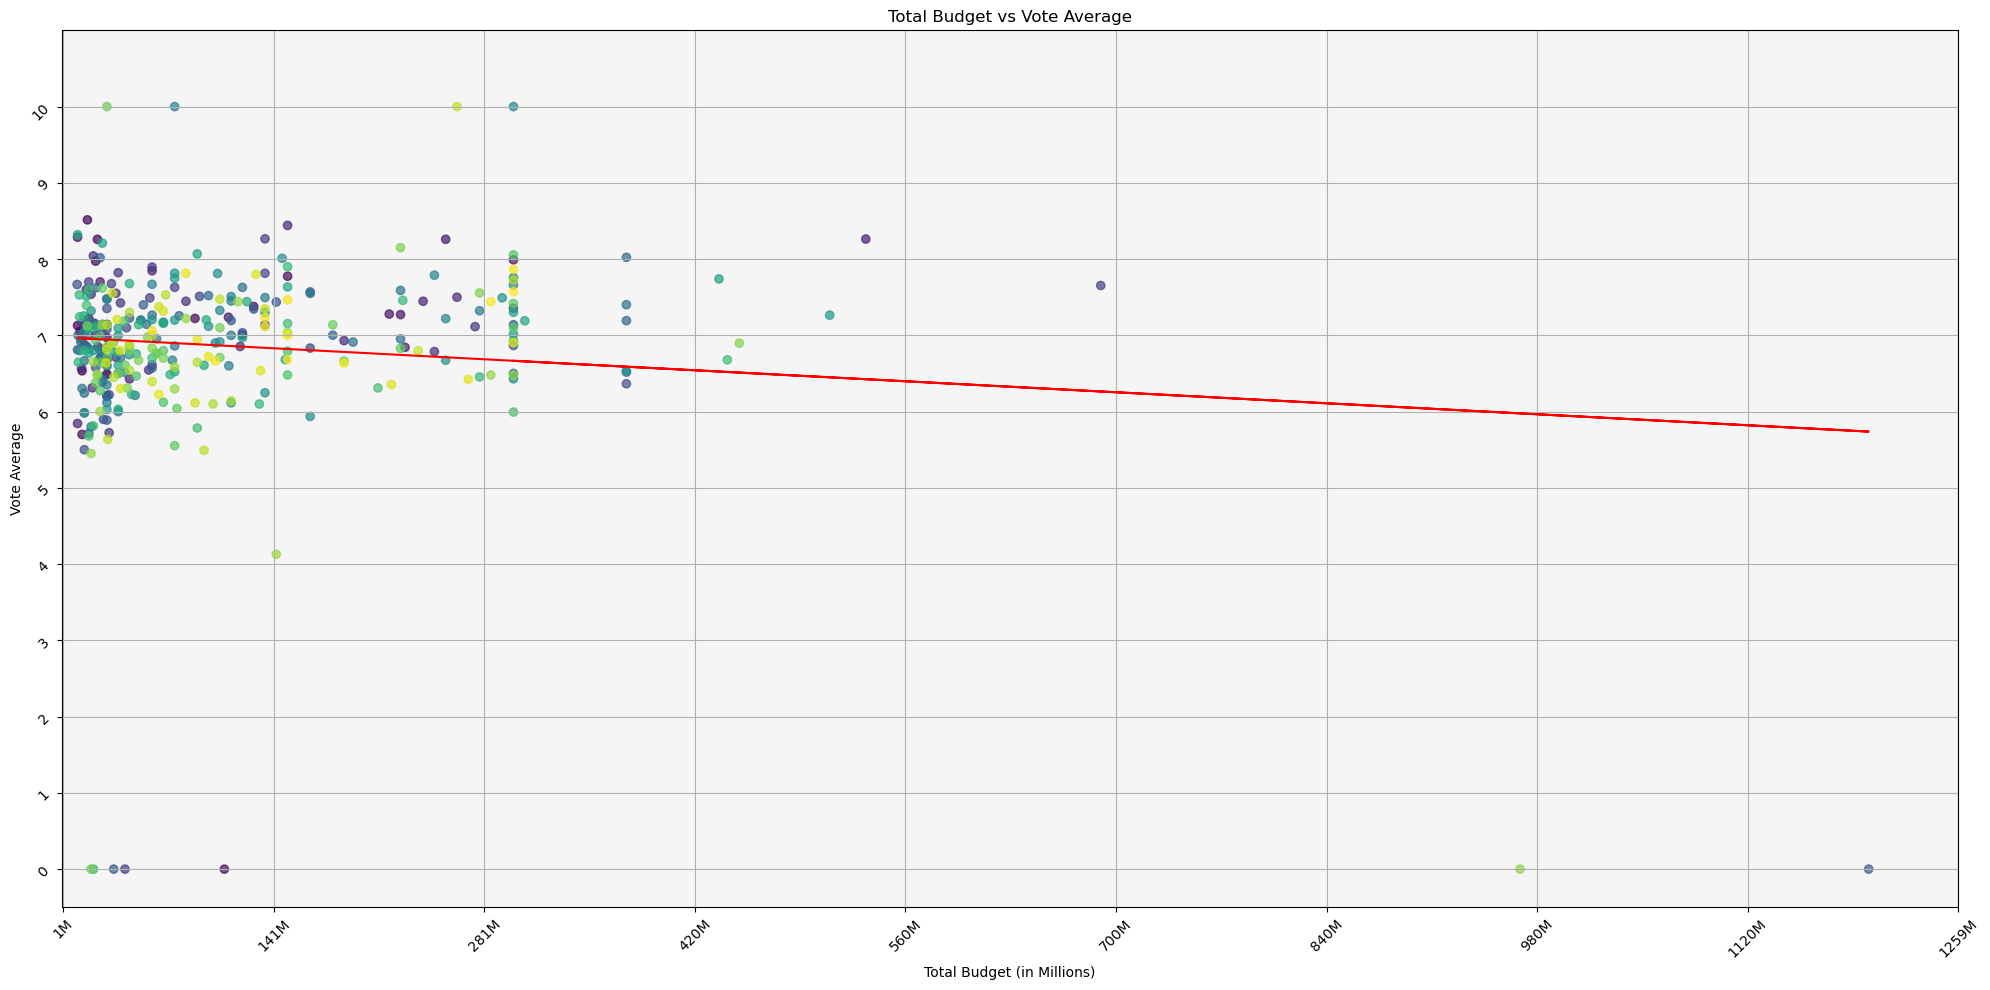

The r-value is: 0.012800770639383029


In [10]:
# all movies Total Budget vs Voter Average
x_value = cleaned_filter_df["Total Budget"]
y_value = cleaned_filter_df["vote_average"]  # Ensure vote_average is already a unitless value

# Ensure y_value is not exceeding 10
y_value = np.clip(y_value, 0, 10)  # Clip values to be between 0 and 10

# Calculate the min and max of x_value
min_x = x_value.min()
max_x = x_value.max()

# Define padding (for example, 5% of the range)
padding = 0.05 * (max_x - min_x)

# Adjust min_x and max_x with padding (ensuring min_x does not go below 0)
min_x_padded = max(1000000, min_x - padding)  # Ensuring min_x_padded is not less than 0
max_x_padded = max_x + padding

# Create a range of x ticks from min_x_padded to max_x_padded
x_ticks = np.linspace(min_x_padded, max_x_padded, num=10)

# Set up the figure size (width, height) in inches
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axes
ax.set_facecolor('whitesmoke')

# Set limits for the x and y axes with padding
plt.xlim(0, max_x_padded)  # Set x-axis starting at 0
plt.ylim(-.5, 11)  # Set y-axis limit to 0-10 for unitless y-values

# Create the scatter plot with color customization
colors = plt.cm.viridis(np.linspace(0, 1, len(x_value)))  # Customize color
plt.scatter(x_value, y_value, color=colors, alpha=0.7)  # Set alpha for visibility

# Set x ticks explicitly with rotation
plt.xticks(x_ticks, rotation=45)  # Rotate x ticks by 45 degrees

# Set y ticks explicitly with rotation
y_ticks = np.arange(0, 11, 1)  # Set y ticks from 0 to 10
plt.yticks(y_ticks, rotation=45)  # Rotate y ticks by 45 degrees

# Define a formatter function for the x-axis to convert to millions
def millions(x, pos):
    return f'{x / 1_000_000:.0f}M'  # Format as millions

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

# Add grid lines for better visualization
plt.grid(True)

# Optionally, add a linear regression line
regress_values, r_squared, line_eq = linear_regression(x_value, y_value)
plt.plot(x_value, regress_values, "r-")

# Add labels and title for better understanding
plt.xlabel("Total Budget (in Millions)")
plt.ylabel("Vote Average")
plt.title("Total Budget vs Vote Average")

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.savefig("graphics/budget_vote_average.png")  # Save the figure
plt.show()

print(f"The r-value is: {r_squared}")


In [11]:
# copied_df = cleaned_movie_df.copy()
# copied_df.count()

In [15]:
def determine_new_genre(genres):
    if 'Science Fiction' in genres:
        return 'SciFi'
    elif 'Horror' in genres:
        return 'Horror'
    elif 'Action' in genres:
        return 'Action'
    elif 'Comedy' in genres:
        return 'Comedy'
    elif 'Romance' in genres and 'Comedy' in genres:
        return 'RomCom'
    else:
        return 'Other'

# Apply the function to create a new column 'new_genre'
cleaned_filter_df['new_genre'] = cleaned_filter_df['genres'].apply(determine_new_genre)

# Display the updated DataFrame
cleaned_filter_df.head()

,id,title,budget,Total Budget,revenue,% Profit,genres,vote_average,vote_count,popularity,new_genre
1300,635302,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,15800000,23700000.0,503063688,2122.631595,"Action, Animation, Adventure, Fantasy, Thriller",8.259,3413,96.797,Action
81,496243,Parasite,11363000,17044500.0,257591776,1511.289718,"Comedy, Thriller, Drama",8.515,16430,64.627,Comedy
777,570670,The Invisible Man,7000000,10500000.0,144492724,1376.121181,"Thriller, Science Fiction, Horror",7.129,5282,22.738,SciFi
974,522681,Escape Room,9000000,13500000.0,155712077,1153.422793,"Horror, Thriller, Mystery",6.535,4315,25.429,Horror
10732,567646,Extreme Job,8120000,12180000.0,124652206,1023.417126,"Action, Comedy, Crime",7.054,230,12.303,Action


In [13]:
scifi_df = copied_df[copied_df['genres'].str.contains('Science Fiction', na=False)]
scifi_df.head()

NameError: name 'copied_df' is not defined

In [ ]:
copied_df = copied_df[~copied_df['id'].isin(scifi_df['id'])]



In [ ]:
RomCom_df = copied_df[copied_df['genres'].str.contains('Romance', na=False) & 
                             copied_df['genres'].str.contains('Comedy', na=False)]

RomCom_df.count()

In [ ]:
copied_df = copied_df[~copied_df['id'].isin(RomCom_df['id'])]


In [ ]:
horror_df = copied_df[copied_df['genres'].str.contains('Horror', na=False)]
horror_df.count()

In [ ]:
copied_df = copied_df[~copied_df['id'].isin(horror_df['id'])]

In [ ]:
action_df = copied_df[copied_df['genres'].str.contains('Action', na=False)]
action_df.count()
                                                       

In [ ]:
copied_df = copied_df[~copied_df['id'].isin(action_df['id'])]

In [ ]:
comedy_df = copied_df[copied_df['genres'].str.contains('Comedy', na=False)]
comedy_df.count()